In [2]:
import warnings
warnings.simplefilter("ignore", category=UserWarning)
%run Data_and_catalogs_proyect.ipynb

# Here i show the graphic with three parameters

In [3]:
import pandas as pd
import plotly.express as px
import ipywidgets as widgets
from ipywidgets import interact

def graficar_interactivo(df, eje_x, eje_y, tamaño):
    df_limpio = df.dropna(subset=[tamaño])
    
    fig = px.scatter(df_limpio, x=eje_x, y=eje_y, size=tamaño,
                     title=f"Gráfico de dispersión: {eje_x} vs {eje_y} (Tamaño: {tamaño})",
                     labels={eje_x: eje_x, eje_y: eje_y, tamaño: tamaño})
    
    fig.show()

eje_x_widget = widgets.Dropdown(
    options=df_final.columns.tolist(),
    value=df_final.columns[0],
    description='Eje X:',
)

eje_y_widget = widgets.Dropdown(
    options=df_final.columns.tolist(),
    value=df_final.columns[1],
    description='Eje Y:',
)

tamaño_widget = widgets.Dropdown(
    options=[col for col in df_final.columns if pd.api.types.is_numeric_dtype(df_final[col])],
    value=df_final.select_dtypes(include=['number']).columns[0],
    description='Tamaño:',
)

interact(graficar_interactivo, df=widgets.fixed(df_final), eje_x=eje_x_widget, eje_y=eje_y_widget, tamaño=tamaño_widget)

interactive(children=(Dropdown(description='Eje X:', options=('Nombre', 'Spectype', 'Mo', 'Period', 'Eccentric…

<function __main__.graficar_interactivo(df, eje_x, eje_y, tamaño)>

# Here i can select some parameters and know what systems have null values (NaN's)

In [ ]:
# import pandas as pd
# import ipywidgets as widgets
# from IPython.display import display


# output = widgets.Output()

# def filtrar_nulos(columnas_seleccionadas):
#     with output:
#         output.clear_output()
        
#         if len(columnas_seleccionadas) > len(df_final.columns):
#             print("Selecciona un máximo de 6 columnas.")
#             return
#         filtro_nulos = df_final[columnas_seleccionadas].isnull().any(axis=1)
#         nombres_con_nulos = df_final.loc[filtro_nulos, 'Nombre']
#         display(nombres_con_nulos)

# columnas = df_final.columns.tolist()
# checkboxes = [widgets.Checkbox(value=False, description=col) for col in columnas if col != 'Nombre']

# boton = widgets.Button(description="Show systems")

# def on_button_click(b):
#     columnas_seleccionadas = [col.description for col in checkboxes if col.value]
#     filtrar_nulos(columnas_seleccionadas)

# boton.on_click(on_button_click)

# display(widgets.VBox(checkboxes + [boton]))
# display(output)

# Here I make the correlation matrix, positive/negative dendograms and also venn diagram for the selected class of HMXB's and parameters from Neumann and Fortin Catalog

In [10]:
# Asegúrate de definir unique_classes antes de usarla
unique_classes = df_final[class_column].unique().tolist()

# Filtrar valores no nulos en unique_classes
unique_classes = [x for x in unique_classes if pd.notna(x)]

# Filtrar columnas numéricas
numeric_columns = df_final.select_dtypes(include=[np.number]).columns.tolist()
numeric_columns = [col for col in numeric_columns if pd.notnull(col)]

# Interactuar con el usuario
interact(
    correlation_matrix_all,
    selected_classes=widgets.SelectMultiple(
        options=unique_classes,
        value=unique_classes,
        description='Classes:',
        disabled=False
    ),
    selected_columns=widgets.SelectMultiple(
        options=numeric_columns,
        value=numeric_columns[:8],
        description='Parameters:',
        disabled=False
    )
)


interactive(children=(SelectMultiple(description='Classes:', index=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, …

<function __main__.correlation_matrix_all(selected_classes, selected_columns)>

# Here I request all systems where there are missing values in one (or more) column, except in the other ones.

In [11]:
import pandas as pd
import numpy as np
from ipywidgets import interact, widgets

class_column = 'Class'

def correlation_matrix_all(selected_classes, selected_columns_nan, selected_columns_non_nan):
    if len(selected_columns_nan) == 0 and len(selected_columns_non_nan) == 0:
        print("Por favor selecciona al menos una columna con valores nulos o valores conocidos.")
        return

    if len(selected_classes) == 0:
        print("Por favor selecciona al menos una clase.")
        return
    
    numeric_columns = df_final.select_dtypes(include=[np.number]).columns.tolist()
    selected_columns_nan = list(selected_columns_nan)
    selected_columns_non_nan = list(selected_columns_non_nan)
    
    selected_columns_nan = [col for col in selected_columns_nan if col in numeric_columns]
    selected_columns_non_nan = [col for col in selected_columns_non_nan if col in numeric_columns]
    
    if len(selected_columns_nan) > 0 or len(selected_columns_non_nan) > 0:
        filtered_df_final = df_final[df_final[class_column].isin(selected_classes)][selected_columns_nan + selected_columns_non_nan + ['Nombre']]
        
        missing_data = filtered_df_final[filtered_df_final[selected_columns_nan].isnull().all(axis=1)]

        complete_data = filtered_df_final[filtered_df_final[selected_columns_non_nan].notnull().all(axis=1)]

        intersection_data = pd.merge(missing_data, complete_data, how='inner', on='Nombre', suffixes=('_nan', '_non_nan'))

        intersection_data.columns = [col.replace('_nan', '').replace('_non_nan', '') for col in intersection_data.columns]
        
        if intersection_data.empty:
            print("No hay sistemas que cumplan ambas condiciones (valores nulos en algunas columnas y completos en otras).")
        else:
            print("Sistemas que tienen valores nulos en las columnas seleccionadas y valores completos en las otras columnas:")
            print(intersection_data[['Nombre'] + selected_columns_nan + selected_columns_non_nan])
        
    else:
        print("Por favor selecciona al menos una columna con valores nulos o valores conocidos.")

unique_classes = [x for x in unique_classes if pd.notna(x)]
numeric_columns = [col for col in numeric_columns if pd.notnull(col)]

interact(
    correlation_matrix_all,
    selected_classes=widgets.SelectMultiple(
        options=unique_classes,
        value=unique_classes,
        description='Classes:',
        disabled=False
    ),
    selected_columns_nan=widgets.SelectMultiple(
        options=numeric_columns,
        value=[],
        description='NaNs:',
        disabled=False
    ),
    selected_columns_non_nan=widgets.SelectMultiple(
        options=numeric_columns,
        description='no NaNs:',
        disabled=False
    )
)


interactive(children=(SelectMultiple(description='Classes:', index=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, …

<function __main__.correlation_matrix_all(selected_classes, selected_columns_nan, selected_columns_non_nan)>

# Now I make the histogram for the distance in the Distance Column of Fortin and the BAT/Swift Flux in the Actualized Neuman catalog.

In [16]:
cat_neuman_2['mean_BAT_flux'] = (cat_neuman_2['BAT_max_flux'] + cat_neuman_2['BAT_min_flux']) / 2

cat_neuman_2.head()

,Name,RAdeg,DEdeg,PosErr,Coord_Ref,ID_Flag,GLON,GLAT,Xray_Type,Porb,...,Comments,_2MASS_ID,CatWISE_ID,ROSAT_ID,XMM_ID,Chandra_ID,XRT_ID,BAT_ID,INTEGRAL_ID,mean_BAT_flux
0,IGR J00370+6122,92901325802,6.136013e+12,1.290736e+11,2023A&A...674A...1G,0.0,12122142246530700,-1.464188e+16,SG,15.67,...,NaN,00370963+6121363,J003709.63+612136.4,2RXS J003710.1+612122,4XMM J003709.8+612136,NaN,2SXPS J003709.6+612135,SWIFT J0037.2+6123,IGR J00370+6122,1.842000e+16
1,gam Cas,1417745099821,6.071672e+12,3.013292e-03,2023A&A...674A...1G,0.0,12357699287978200,-2.148422e+16,"BE,Gcas,RS",203.59,...,NaN,00564251+6043002,NaN,2RXS J005642.4+604256,4XMM J005642.4+604259,NaN,NaN,SWIFT J0056.7+6043,NaN,8.344000e+01
2,TYC 3681-695-1,1899604069884,5.915394e+12,1.687720e+11,2023A&A...674A...1G,0.0,12608001405133000,-3.567683e+16,Gcas,NaN,...,NaN,01155905+5909141,J011559.04+590914.1,NaN,4XMM J011558.9+590913,NaN,NaN,NaN,NaN,NaN
3,2S 0114+650,1951122704686,6.529162e+12,1.163873e+11,2023A&A...674A...1G,0.0,12570998154557300,2.563491e+16,"CL,SG,XP",11.60,...,Superorbital period: 30.76 d (2013ApJ...778......,01180266+6517298,J011802.68+651729.8,NaN,4XMM J011802.6+651731,NaN,2SXPS J011802.8+651726,SWIFT J0117.8+6516,NaN,1.554000e+02
4,4U 0115+63,1963319348306,6.374252e+12,1.628558e+11,2023A&A...674A...1G,0.0,12592352060725100,1.028267e+16,"BE,CL,HT,QPO,XB,XP,XT",24.30,...,NaN,01183196+6344330,J011831.96+634433.0,NaN,4XMM J011831.9+634433,NaN,2SXPS J011831.6+634431,SWIFT J0118.5+6344,NaN,6.626000e+01


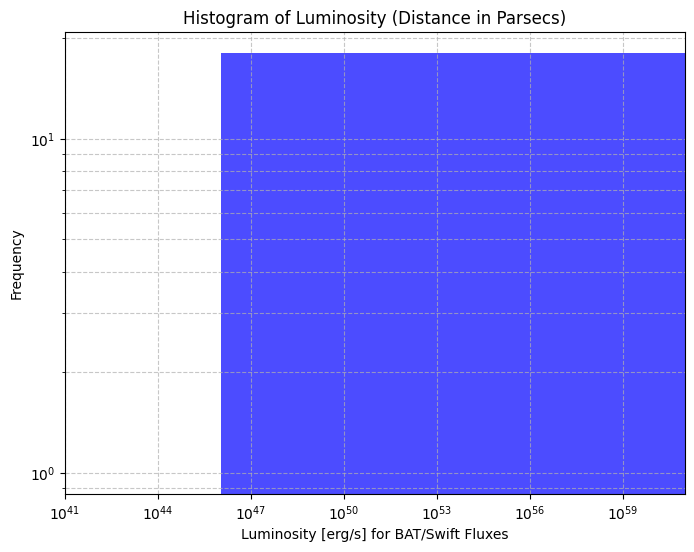

In [55]:

import matplotlib.pyplot as plt
import numpy as np

# Filtrar nombres comunes
common_names = cat_neuman_2['Name'].isin(v2023_09_Fortin['Main_ID'])
cat_neuman_2_common = cat_neuman_2[common_names]
fortin_common = v2023_09_Fortin[common_names]

# Unir datos
common_data = pd.merge(cat_neuman_2_common[['Name', 'mean_BAT_flux']], 
                       fortin_common[['Main_ID', 'Distance']], 
                       left_on='Name', right_on='Main_ID')

# Convertir distancia de parsecs a centímetros
parsec_to_cm = 3.086e18
common_data['Distance_cm'] = common_data['Distance'] * parsec_to_cm

# Calcular luminosidad usando la distancia en cm
pi = np.pi
common_data['Luminosity'] = 4 * pi * common_data['mean_BAT_flux'] * common_data['Distance_cm']**2

# Graficar histograma de la luminosidad
plt.figure(figsize=(8, 6))
plt.hist(common_data['Luminosity'], bins=10, color='blue', alpha=0.7)
plt.xscale('log')  # Escala logarítmica en el eje x
plt.yscale('log')  # Escala logarítmica en el eje y
plt.title('Histogram of Luminosity (Distance in Parsecs)')
plt.xlabel('Luminosity [erg/s] for BAT/Swift Fluxes')
plt.ylabel('Frequency')
plt.xlim(10e40,10e60)
plt.grid(True, which="both", linestyle="--", alpha=0.7)
plt.show()


In [ ]:
'B0 IIIne' in cat_neuman['SpType'].unique()